In [2]:
import pandas as pd
raw = pd.read_csv("../data/interim/ec2_cpu_utilization_5f5533.csv")
raw['timestamp'] = pd.to_datetime(raw['timestamp'])
raw.to_csv("../data/processed/processed.csv")


plot all values


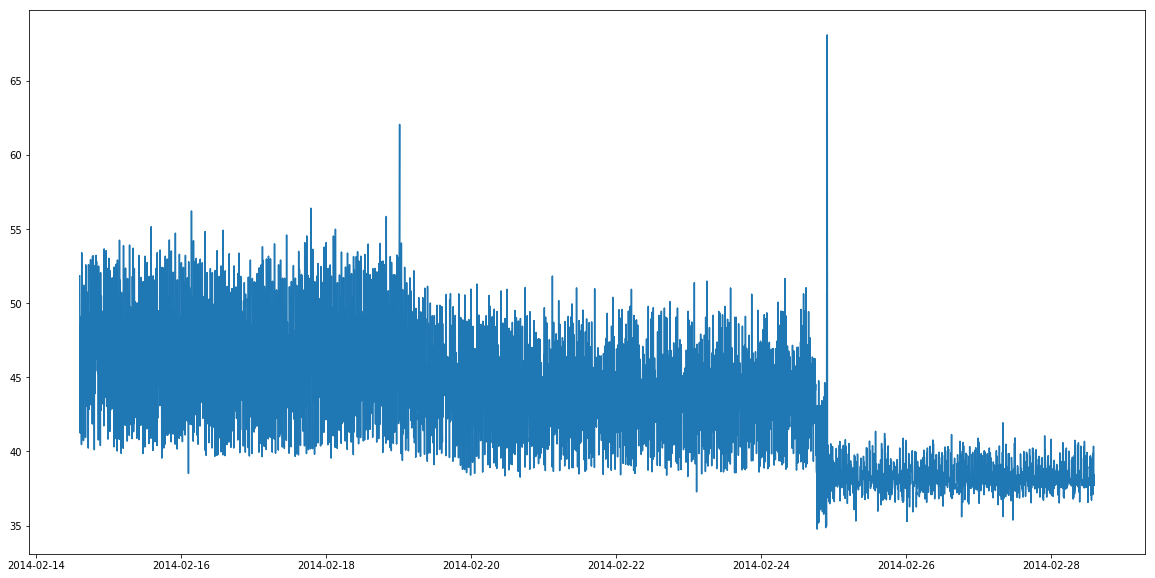

In [4]:
import matplotlib.pyplot as plt
df = pd.read_csv("../data/processed/processed.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

def plot_df(df):
    dates = sorted(list(df['timestamp'].unique()))
    values = df['value'].values.tolist()
    plt.figure(figsize=(20, 10))
    plt.plot(dates, values)
    plt.show()

print "plot all values"
plot_df(df)

Extracting some more features...
1. the hour in timestamp
2. whether it's during daylight
plot values during daylight


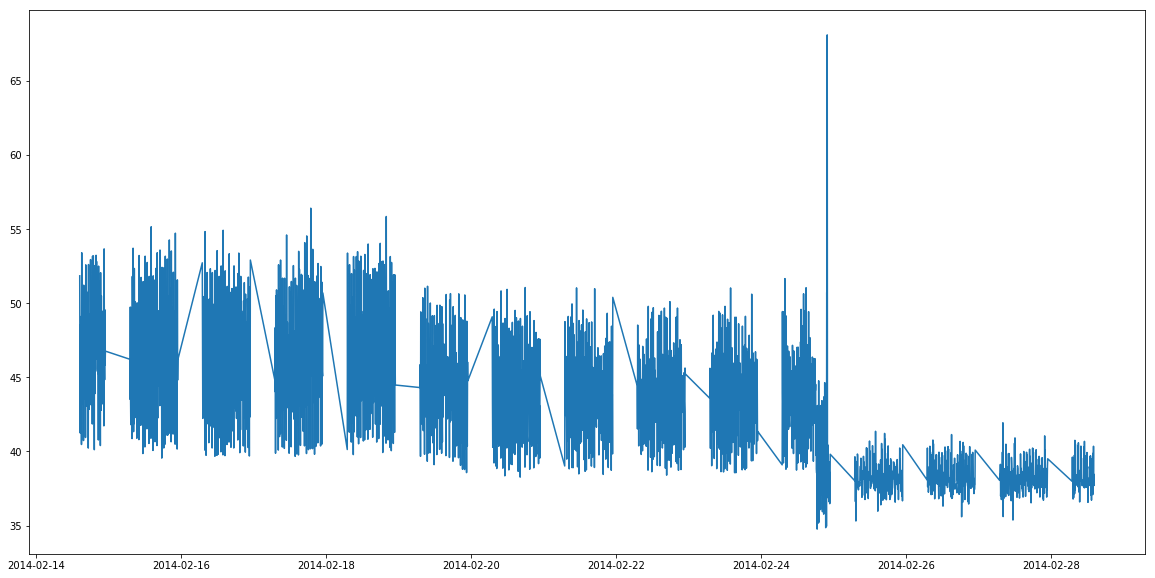

plot values during night


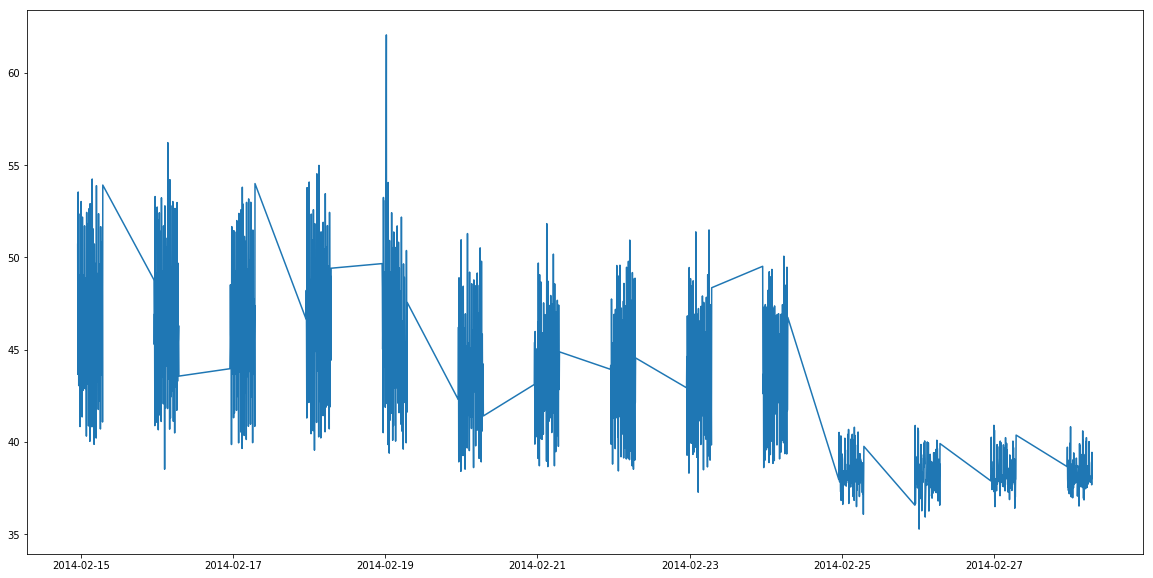

In [7]:
print "Extracting some more features..."
print "1. the hour in timestamp"
df['hours'] = df['timestamp'].dt.hour
print "2. whether it's during daylight"
df['daylight'] = ((df['hours'] >= 7) & (df['hours'] <= 22)).astype(int)
print "plot values during daylight"
df_daylight = df[df['daylight'] == 1]
plot_df(df_daylight)
print "plot values during night"
df_daylight = df[df['daylight'] != 1]
plot_df(df_daylight)

3. the day of the week
4. whether it is a week day
plot values during weekdays


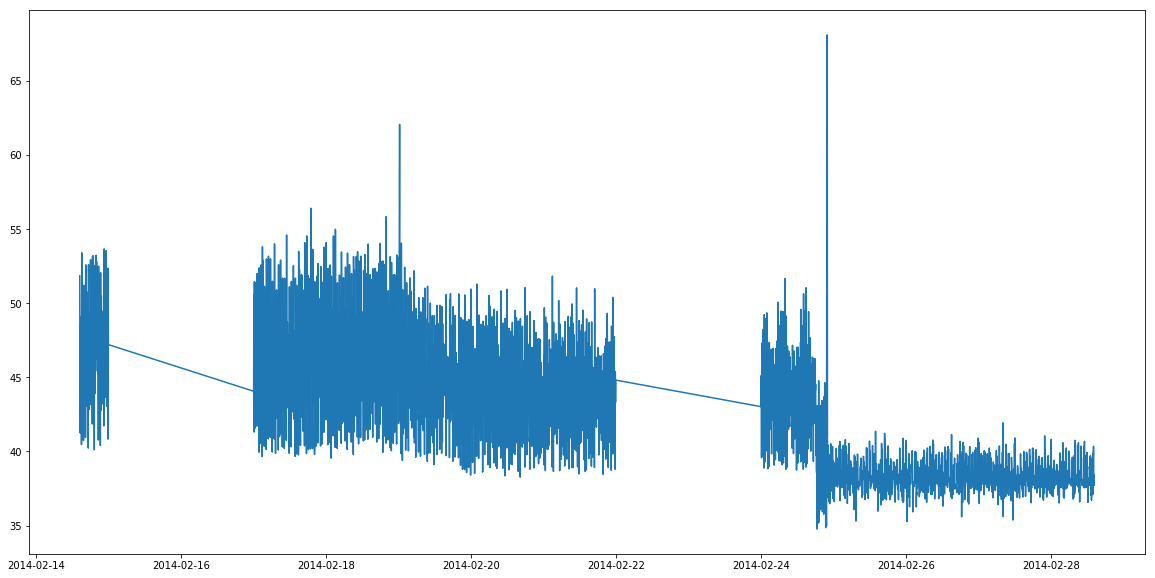

plot values during weekends


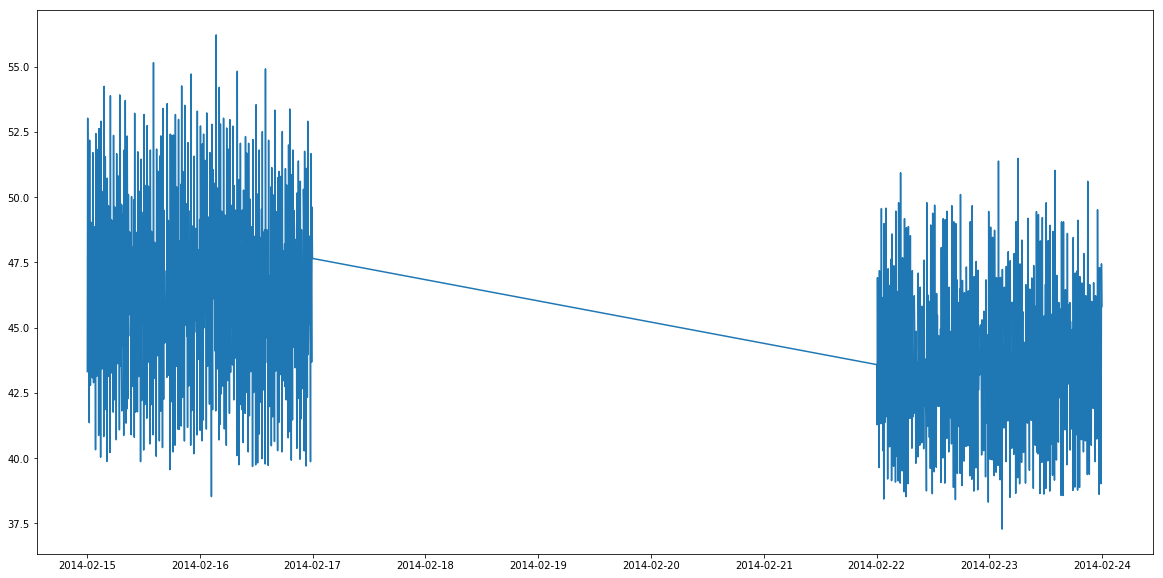

In [8]:
print "3. the day of the week"
df['day_of_the_week'] = df['timestamp'].dt.dayofweek
print "4. whether it is a week day"
df['is_week_day'] = (df['day_of_the_week'] < 5).astype(int)
print "plot values during weekdays"
df_daylight = df[df['is_week_day'] == 1]
plot_df(df_daylight)
print "plot values during weekends"
df_daylight = df[df['is_week_day'] != 1]
plot_df(df_daylight)

Combine daylight and weekday to split into 4 categories


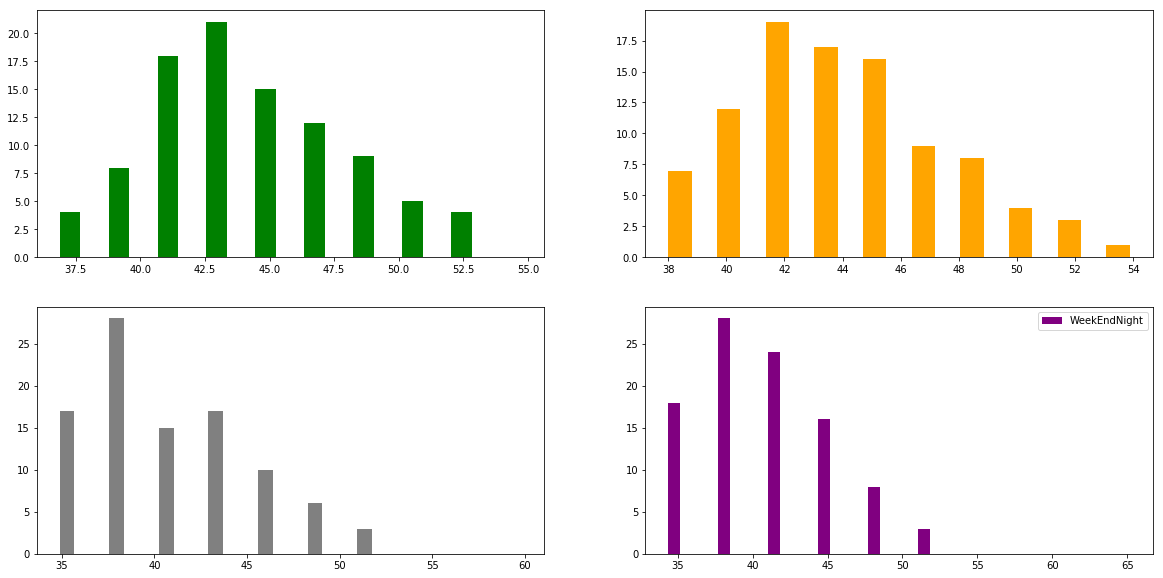

In [9]:
print "Combine daylight and weekday to split into 4 categories"
import numpy as np
df['categories'] = df['is_week_day']*2 + df['daylight']
fig = plt.figure(4, figsize=(20, 10))
colors = ['green', 'orange', 'grey', 'purple']
for cat in range(4):
    df_cat = df.loc[df['categories'] == cat, 'value']
    ax = fig.add_subplot('22' + str(cat + 1))
    heights, bins = np.histogram(df_cat)
    ax.bar(bins[:-1], heights*100/df_cat.count(),  facecolor=colors[cat], label='WeekEndNight')

plt.legend()
plt.show()

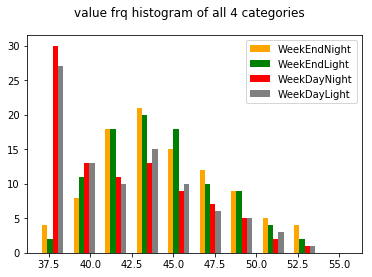

In [25]:
a = df.loc[df['categories'] == 0, 'value']
b = df.loc[df['categories'] == 1, 'value']
c = df.loc[df['categories'] == 2, 'value']
d = df.loc[df['categories'] == 3, 'value']

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(a)
b_heights, b_bins = np.histogram(b, bins=a_bins)
c_heights, c_bins = np.histogram(c, bins=a_bins)
d_heights, d_bins = np.histogram(d, bins=a_bins)

width = (a_bins[1] - a_bins[0])/6
ax.bar(a_bins[:-1], a_heights*100/a.count(), width=width, facecolor='orange', label='WeekEndNight')
ax.bar(b_bins[:-1]+width, (b_heights*100/b.count()), width=width, facecolor='green', label ='WeekEndLight')
ax.bar(c_bins[:-1]+width*2, (c_heights*100/c.count()), width=width, facecolor='red', label ='WeekDayNight')
ax.bar(d_bins[:-1]+width*3, (d_heights*100/d.count()), width=width, facecolor='grey', label ='WeekDayLight')

fig.suptitle("value frq histogram of all 4 categories")
plt.legend()
plt.show()

In [24]:
df.to_csv("../data/processed/final.csv")